<a href="https://colab.research.google.com/github/keilabcs/ES-TAES-2020-1/blob/master/Mann_Whitney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Universidade Federal de Pernambuco
#### Pós-Graduação em Ciências da Computação - Cin/UFPE

Discentes

*   Keila Barbosa
*   Denini Gabriel
*   Irvin Bezerra

------------------------------------------------------------------

### Teste de normalidade dos dados

Um ponto de decisão importante ao trabalhar com uma amostra de dados é usar métodos estatísticos paramétricos ou não paramétricos.

Os métodos estatísticos paramétricos assumem que os dados têm uma distribuição conhecida e específica, geralmente uma distribuição Gaussiana. Se uma amostra de dados não for gaussiana, as suposições dos testes estatísticos paramétricos são violadas e métodos estatísticos não paramétricos devem ser usados.

Existem várias técnicas que você pode usar para verificar se sua amostra de dados se desvia de uma distribuição gaussiana, chamados de testes de normalidade.

Verificar se a amostra de dados é gaussiana ou suficientemente semelhante a gaussiana para usar as técnicas padrão, ou suficientemente não gaussiana para usar métodos estatísticos não paramétricos.

https://www.inf.ufsc.br/~andre.zibetti/probabilidade/normal.html

In [ ]:
If Data Is Gaussian:
	Use Parametric Statistical Methods
Else:
	Use Nonparametric Statistical Methods

Importando os módulos

In [2]:
from numpy.random import randn
from numpy import mean
from numpy import std
import csv, sys
from matplotlib import pyplot
import glob
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Leia o csv

In [5]:
uploaded = files.upload()

Saving new_results.csv to new_results.csv


In [6]:
ls

new_results.csv  ranking.csv  sample_data/


In [7]:
data = pd.read_csv('new_results.csv')
data.head()

,build,mismanaging,rework,unnecessarily,extraneous,psychological,waiting,knowledge,ineffective,opiniao,estado
0,3,3,3,1,3,0,0,2,3,NaN,Pernambuco
1,3,1,2,1,3,3,3,0,2,Falta de interesse naquilo que se está fazendo,Pernambuco
2,2,2,2,2,2,2,1,2,2,Prazos muita pequenos para tarefas muito compl...,Pernambuco
3,3,1,1,2,2,1,2,1,2,NaN,Pernambuco
4,2,3,3,3,3,3,2,3,3,NaN,Pernambuco


In [8]:
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=49.963 stdv=5.051


### Análise descritiva dos dados

Box-plot e Histograma da amostra ssimetria na distribuição dos dados.

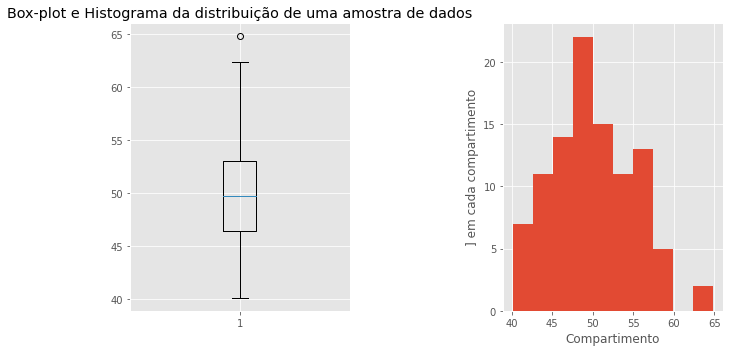

In [9]:
# Define o stilo para ggplot
plt.style.use("ggplot")

# Cada plot terá o mesmo tamanho de figuras (10,5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Creating plot 
plt.subplot(1, 2, 1)
plt.boxplot(data) 
plt.title('Box-plot e Histograma da distribuição de uma amostra de dados')

# Histogram plot
plt.subplot(1, 2, 2)
pyplot.hist(data)

plt.xlabel("Compartimento", fontsize=12)  
plt.ylabel("] em cada compartimento", fontsize=12)

plt.tight_layout()
pyplot.show()

Gráfico popular para verificar a distribuição de uma amostra de dados é o gráfico quantil-quantil, gráfico QQ ou gráfico QQ, para abreviar.

Cada ponto de dados na amostra é emparelhado com um membro semelhante da distribuição idealizada na mesma distribuição cumulativa.

Os pontos resultantes são plotados como um gráfico de dispersão com o valor idealizado no eixo x e a amostra de dados no eixo y.

Gráfico QQ mostrando o gráfico de dispersão de pontos em uma linha diagonal, ajustando-se ao padrão diagonal esperado para uma amostra de uma distribuição gaussiana.

Existem alguns pequenos desvios, especialmente na parte inferior do gráfico, o que é esperado dada a pequena amostra de dados.

Text(0.5, 1.0, 'Distribuições de probabilidade')

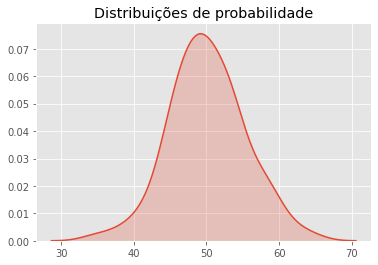

In [53]:
sns.kdeplot (data, shade=True)
plt.xlabel("Compartimento", fontsize=12)  
plt.ylabel("Número de observações em cada compartimento", fontsize=12)
plt.title("Distribuição Gaussiana")

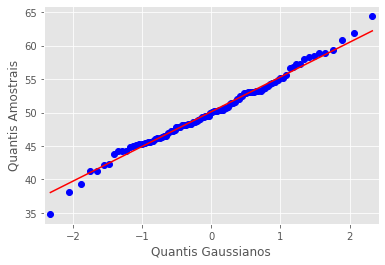

In [54]:
# q-q plot
qqplot(data, line='s')
plt.xlabel("Quantis Gaussianos", fontsize=12)  
plt.ylabel("Quantis Amostrais", fontsize=12)
pyplot.show()

Os testes assumem que a amostra foi retirada de uma distribuição gaussiana. 
Tecnicamente, isso é chamado de hipótese nula ou H0. 
Um nível de limite é escolhido chamado alfa, normalmente 5% (ou 0,05), que é usado para interpretar o valor p.

*   p <= alfa : rejeita H0, não normal.
*   p> alfa : falha ao rejeitar H0, normal.

Isso significa que, em geral, estamos buscando resultados com um valor p maior para confirmar que nossa amostra foi provavelmente extraída de uma distribuição gaussiana.

Um resultado acima de 5% não significa que a hipótese nula seja verdadeira. Isso significa que é muito provável, dadas as evidências disponíveis.


In [55]:
# Teste Shapiro-Wilk
from scipy.stats import shapiro

# Teste de normalidade
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretar
alpha = 0.05
if p > alpha:
	print('A amostra parece gaussiana (falhar em rejeitar H0)')
else:
	print('A amostra não parece gaussiana(rejeitar H0)')

Statistics=0.993, p=0.887
A amostra parece gaussiana (falhar em rejeitar H0)


O valor p é interpretado em relação a um alfa de 5% e descobre que o conjunto de dados de teste não se desvia significativamente do normal.

In [56]:
# Teste K ^ 2 de D'Agostino
from scipy.stats import normaltest

# Teste de normalidade
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretar
alpha = 0.05
if p > alpha:
	print('A amostra parece gaussiana (falhar em rejeitar H0)')
else:
	print('A amostra não parece gaussiana(rejeitar H0)')

Statistics=1.023, p=0.600
A amostra parece gaussiana (falhar em rejeitar H0)


Teste Anderson-Darling

In [57]:
# Teste Anderson-Darling
from scipy.stats import anderson

# Gerar observações univariadas
data = 5 * randn(100) + 50

# Teste de normalidade
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, Os dados parecem normais (falha ao rejeitar H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, Os dados não parecem normais (rejeitar H0)' % (sl, cv))

Statistic: 0.384
15.000: 0.555, Os dados parecem normais (falha ao rejeitar H0)
10.000: 0.632, Os dados parecem normais (falha ao rejeitar H0)
5.000: 0.759, Os dados parecem normais (falha ao rejeitar H0)
2.500: 0.885, Os dados parecem normais (falha ao rejeitar H0)
1.000: 1.053, Os dados parecem normais (falha ao rejeitar H0)


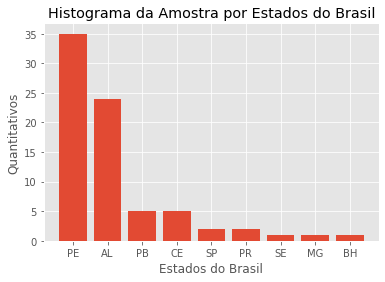

In [58]:
# Rank por Estados do Brasil

plt.style.use("ggplot")

plt.xlabel("Estados do Brasil", fontsize=12)  
plt.ylabel("Quantitativos", fontsize=12)
plt.title('Histograma da Amostra por Estados do Brasil')

grupos = ['PE', 'AL', 'PB', 'CE', 'SP', 'PR', 'SE', 'MG', 'BH']
valores = [35, 24, 5, 5, 2, 2, 1, 1,1 ]
plt.bar(grupos, valores)
plt.show()

# Análises dos Resultados

Resultados T-testes

In [65]:
# Ranking Geral
ranking = pd.read_csv('ranking.csv')
ranking.head()

,build,mismanaging,rework,unnecessarily,extraneous,psychological,waiting,knowledge,ineffective
0,3,4,4,1,2,5,2,4,4


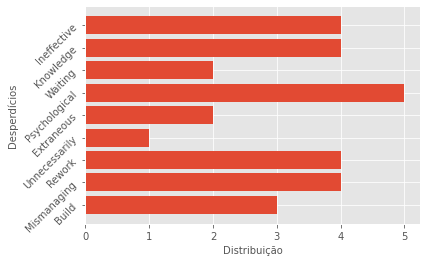

In [104]:
# Ranking Geral por desperdícios

plt.style.use("ggplot")

plt.xlabel("Rank", fontsize=10)  
plt.ylabel("Desperdícios", fontsize=10)
#plt.title('Ranking Geral por desperdícios')

grupos2 = ['Build', 'Mismanaging', 'Rework', 'Unnecessarily', 'Extraneous', 'Psychological', 'Waiting', 'Knowledge', 'Ineffective']
valores2 = [3, 4, 4, 1, 2, 5, 2, 4, 4]

plt.barh(grupos2, valores2)
plt.yticks(rotation=45)

plt.show()
#plt.bar(grupos2, valores2)

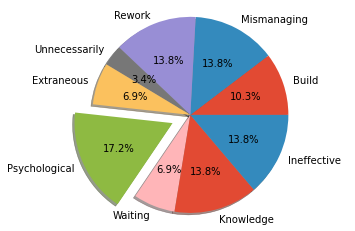

In [91]:
#Gráfico de Pizza

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0, 0, 0, 0, 0.2, 0, 0, 0) 
labels=grupos2

#define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(valores2, labels=grupos2, autopct='%1.1f%%', shadow=True, explode=explode)

# inseri a legenda e a localização da legenda.
#plt.legend(labels, loc=3)

#plt.title('Percentagem do Ranking Geral por desperdícios')

# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.show()

In [101]:
# Resumo das Respostas
resumo_respostas = pd.read_csv('resumo_respostas.csv')
resumo_respostas.head()

,pergunta,Nunca observei,Observo raramente,Observo ocasionalmente,frequência
0,build,11,20,26,18
1,mismanaging,5,17,26,27
2,rework,6,10,34,25
3,unnecessarily,9,30,27,9
4,extraneous,2,14,22,37


In [10]:
base = pd.read_csv('rank.csv')
base.head()

,waste,rank,candidate,State
0,build,1,1,PE
1,mismanaging,1,1,PE
2,rework,1,1,PE
3,unnecessarily,3,1,PE
4,extraneous,1,1,PE


In [1]:
df = base['rank']
df_sum = df.value_counts()
df_sum = df_sum.sort_index()

x = df_sum.index
y = df_sum

plt.figure()
plt.bar(x, y)

# Configurações do texto
plt.text(0.4, 70.0, "Nunca observei", fontsize=8, horizontalalignment='right')
plt.text(0.20, 150, "Observo raramente", fontsize=8, horizontalalignment='right')
plt.text(0.12, 70.0, "Observo ocasionalmente", fontsize=8, horizontalalignment='right')
plt.text(0.20, 70.0, "Observo frequência", fontsize=8, horizontalalignment='right')

plt.title('Distribuição por ')
plt.xlabel('Peso')
plt.ylabel('Distribuição')
plt.xticks(x) # obriga a mostrar todos os números no eixo x


NameError: ignored